# Lab-2

## Import of libraries & dataset

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import norm, skew, kurtosis, shapiro, chisquare, gaussian_kde, kstest, ttest_ind, spearmanr
from statistics import correlation
import statsmodels.api as sm

In [8]:
dataset = datasets.load_iris()

ext_target = dataset.target[:, None]
iris_data_frame = pd.DataFrame(
    np.concatenate((dataset.data, ext_target, dataset.target_names[ext_target]), axis=1),
    columns=dataset.feature_names + ['target label', 'target name'],
)

## Task 1

### Creating random sample

Create pd Series SETOSA: SEPALLEN, SEPALWID, PETALLEN

In [9]:
setosa_sepallen = iris_data_frame.loc[iris_data_frame['target name'] == 'setosa']['sepal length (cm)'].astype(float)
setosa_sepalwid = iris_data_frame.loc[iris_data_frame['target name'] == 'setosa']['sepal width (cm)'].astype(float)
setosa_petallen = iris_data_frame.loc[iris_data_frame['target name'] == 'setosa']['petal length (cm)'].astype(float)

Create data frame with our random sample

In [15]:
setosa_data_frame = iris_data_frame.loc[iris_data_frame['target name'] == 'setosa'][['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']].astype(float)
setosa_data_frame

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
5,5.4,3.9,1.7
6,4.6,3.4,1.4
7,5.0,3.4,1.5
8,4.4,2.9,1.4
9,4.9,3.1,1.5


### Correlation analysis

Creating the matrix of correlations

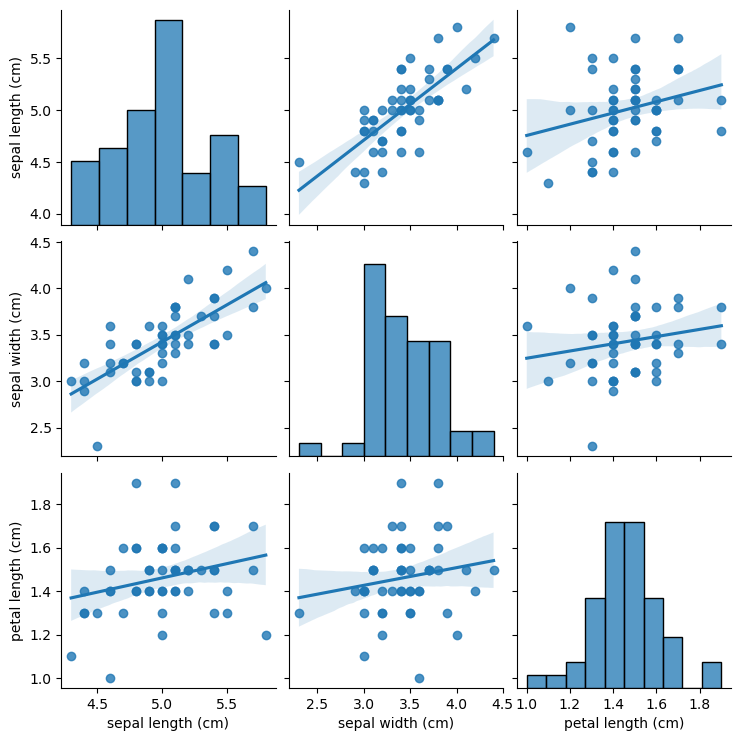

In [16]:
sns.pairplot(data=setosa_data_frame, kind='reg', diag_kind='auto')
None

Checking the correlation where SEPALLEN is dependent variable, SEPALWID is independent variable. Show the scatterplot.

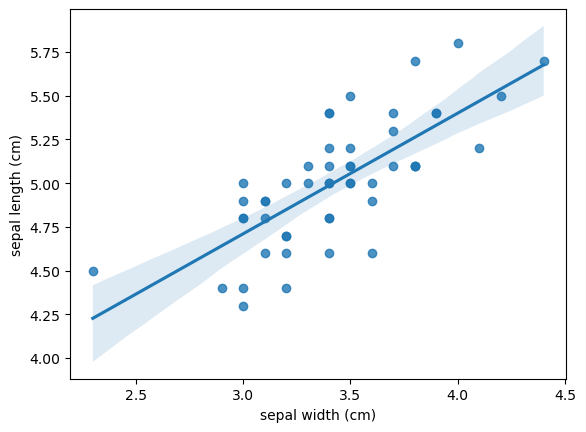

In [17]:
sns.regplot(
    x='sepal width (cm)', 
    y='sepal length (cm)', 
    data=setosa_data_frame)
None

#### is SEPALWID has normal disrtibution?

Visualize the histogram of SEPALWID

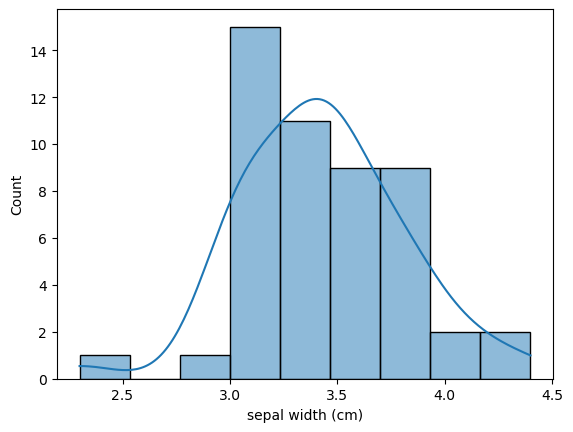

In [18]:
sns.histplot(data=setosa_sepalwid, kde=True)
None

Don't reject the $H_0$. Check the criteria for $H_0$.

In [19]:
shapiro_test = shapiro(setosa_sepalwid)
expected = norm(loc=setosa_sepalwid.mean(), scale=setosa_sepalwid.std()).rvs(size=50)
ks_test = kstest(setosa_sepalwid, expected)
chis_test = chisquare(f_obs=setosa_sepalwid.value_counts(), ddof=0, axis=None)
print('Shapiro-Wilk test: ' + str(shapiro_test.pvalue))
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))
print('Chi-Square test: ' + str(chis_test.pvalue))

Shapiro-Wilk test: 0.2715126574039459
Kolmogorov-Smirnov test: 0.5486851446031328
Chi-Square test: 0.025349250037615446


#### testing the hypothesis of correlation=0 between SEPALLEN & SEPALWID

In [20]:
corr = correlation(setosa_data_frame['sepal length (cm)'], setosa_data_frame['sepal width (cm)'])
print('pearson correlation coefficient: ' + str(corr))
ttest_result = stats.ttest_ind(setosa_data_frame['sepal length (cm)'], setosa_data_frame['sepal width (cm)'])
print('T-test P-value: ' + str(ttest_result.pvalue))

pearson correlation coefficient: 0.7425466856651596
T-test P-value: 5.666981945473851e-39


### testing the hypothesis of correlation=0 between SEPALLEN & PETALLEN

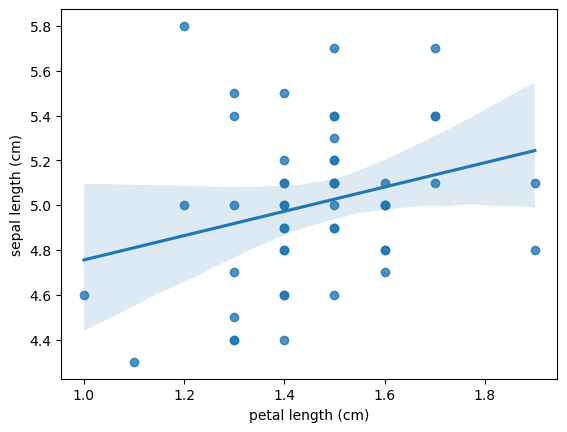

In [21]:
sns.regplot(
    x='petal length (cm)', 
    y='sepal length (cm)', 
    data=setosa_data_frame)
None

#### is PETALLEN has normal distribution?

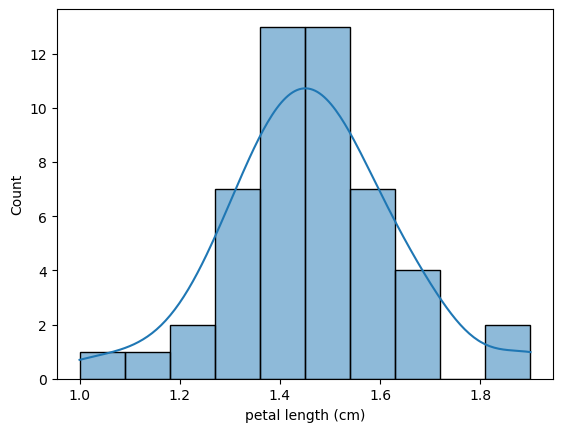

In [22]:
sns.histplot(data=setosa_petallen, kde=True)
None

In [23]:
shapiro_test = shapiro(setosa_petallen)
expected = norm(loc=setosa_petallen.mean(), scale=setosa_petallen.std()).rvs(size=50)
ks_test = kstest(setosa_petallen, expected)
chis_test = chisquare(f_obs=setosa_petallen.value_counts(), ddof=0, axis=None)
print('Shapiro-Wilk test: ' + str(shapiro_test.pvalue))
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))
print('Chi-Square test: ' + str(chis_test.pvalue))

Shapiro-Wilk test: 0.05481128394603729
Kolmogorov-Smirnov test: 0.5486851446031328
Chi-Square test: 5.7631046419157774e-05


In [232]:
corr = correlation(setosa_data_frame['sepal length (cm)'], setosa_data_frame['petal length (cm)'])
print('pearson correlation coefficient: ' + str(corr))
ttest_result = stats.ttest_ind(setosa_data_frame['sepal length (cm)'], setosa_data_frame['petal length (cm)'])
print('T-test P-value: ' + str(ttest_result.pvalue))

pearson correlation coefficient: 0.2671757588687571
T-test P-value: 1.3140296801836079e-81


### Regression analysis

Now we will conduct a regression analysis of the influence of factors SEPALWID, PETALLEN on the behavior of a random variable SEPALLEN. Lets create the correlation matrix:

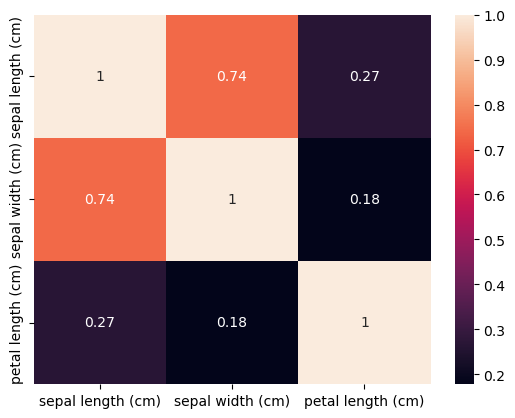

In [233]:
sns.heatmap(setosa_data_frame.corr(), annot = True)
None

In [110]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y=iris_data_frame.loc[iris_data_frame['target name'] == 'setosa'][['sepal length (cm)']].astype(float)
X=iris_data_frame.loc[iris_data_frame['target name'] == 'setosa'][['sepal width (cm)', 'petal length (cm)']].astype(float)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sepal length (cm)   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     31.18
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.40e-09
Time:                        23:27:03   Log-Likelihood:                 2.8091
No. Observations:                  50   AIC:                            0.3819
Df Residuals:                      47   BIC:                             6.118
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.3037      0.385      5.979      0.000       1.529       3.079
sepal width (cm)      0.6674      0.090      7.387      0.000       0.486       0.849
petal length (cm)     0.2834      0.197      1.437      0.157      -0.113       0.680
==============================================================================
Omnibus:                        1.530   Durbin-Watson:                   2.449
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.233
Skew:                           0.180   Prob(JB):                        0.540
Kurtosis:                       2.320   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

petal length has P-value > 0.05 then drop this parameter

In [11]:
y=iris_data_frame.loc[iris_data_frame['target name'] == 'setosa'][['sepal length (cm)']].astype(float)
X=iris_data_frame.loc[iris_data_frame['target name'] == 'setosa'][['sepal width (cm)']].astype(float)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sepal length (cm)   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.99
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           6.71e-10
Time:                        22:51:19   Log-Likelihood:                 1.7341
No. Observations:                  50   AIC:                            0.5319
Df Residuals:                      48   BIC:                             4.356
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6390      0.310      8.513      0.000       2.016       3.262
sepal width (cm)     0.6905      0.090      7.681      0.000       0.510       0.871
==============================================================================
Omnibus:                        0.274   Durbin-Watson:                   2.542
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.464
Skew:                          -0.041   Prob(JB):                        0.793
Kurtosis:                       2.535   Cond. No.                         34.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
linreg = LinearRegression()
linreg.fit(X, y)
predicted_values = linreg.predict(X)
residuals = (setosa_sepallen.to_numpy().T - predicted_values.T).T

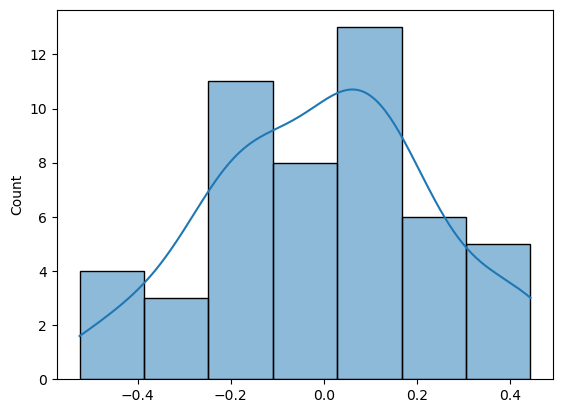

In [158]:
sns.histplot(data=pd.Series(residuals.T[0]), kde=True)
None

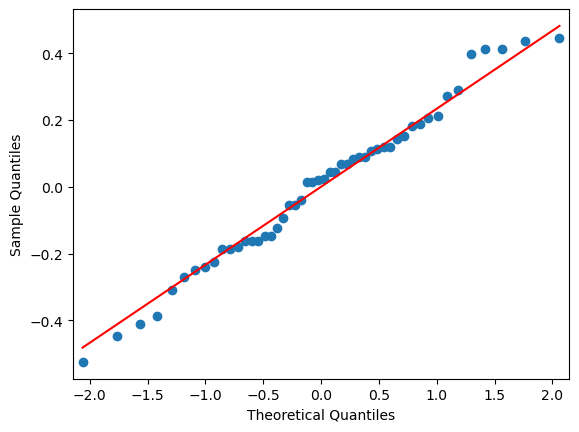

In [159]:
fig = sm.qqplot(pd.Series(residuals.T[0]), line='s')
plt.show()

In [184]:
predicted_residuals = pd.concat([pd.Series(data=residuals.T[0]), 
                                              pd.Series(data=predicted_values.T[0])], axis=1,
                               keys= ['residuals', 'predicted'])
predicted_residuals

,residuals,predicted
0,0.044285,5.055715
1,0.189530,4.710470
2,-0.148568,4.848568
3,-0.179519,4.779519
4,-0.124764,5.124764
5,0.068089,5.331911
6,-0.386666,4.986666
7,0.013334,4.986666
8,-0.241421,4.641421
9,0.120481,4.779519


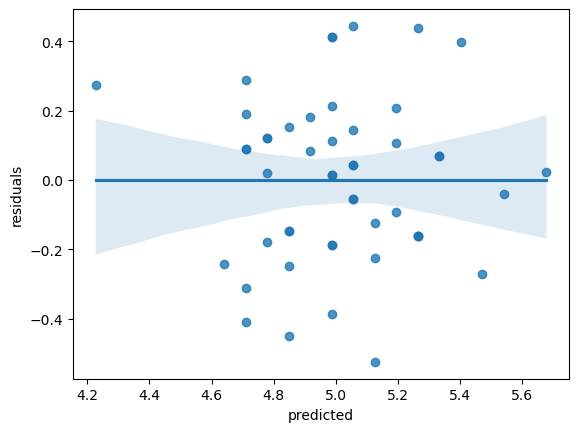

In [185]:
sns.regplot(
    x='predicted', 
    y='residuals', 
    data=predicted_residuals)
None

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

setosa_data_frame = setosa_data_frame.rename(columns={'sepal length (cm)':'sepallen',
                                 'sepal width (cm)':'sepalwid',
                                 'petal length (cm)':'petallen'})

model = ols('sepallen ~ sepalwid', data=setosa_data_frame).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
sepalwid,3.356885,1.0,58.99373,6.709843e-10
Residual,2.731315,48.0,NaN,NaN


## Task 2

### Creating a new random sample with outliers

In [7]:
setosa_data_frame = iris_data_frame.loc[iris_data_frame['target name'] == 'setosa'][['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']].astype(float)
for i in range(5):
    setosa_data_frame.loc[i, 'petal length (cm)'] = 10*random.random()
setosa_petallen = setosa_data_frame['petal length (cm)'].astype(float)
setosa_data_frame

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,5.431271
1,4.9,3.0,2.524563
2,4.7,3.2,7.988240
3,4.6,3.1,8.362760
4,5.0,3.6,1.525346
5,5.4,3.9,1.700000
6,4.6,3.4,1.400000
7,5.0,3.4,1.500000
8,4.4,2.9,1.400000
9,4.9,3.1,1.500000


### Correlation analysis

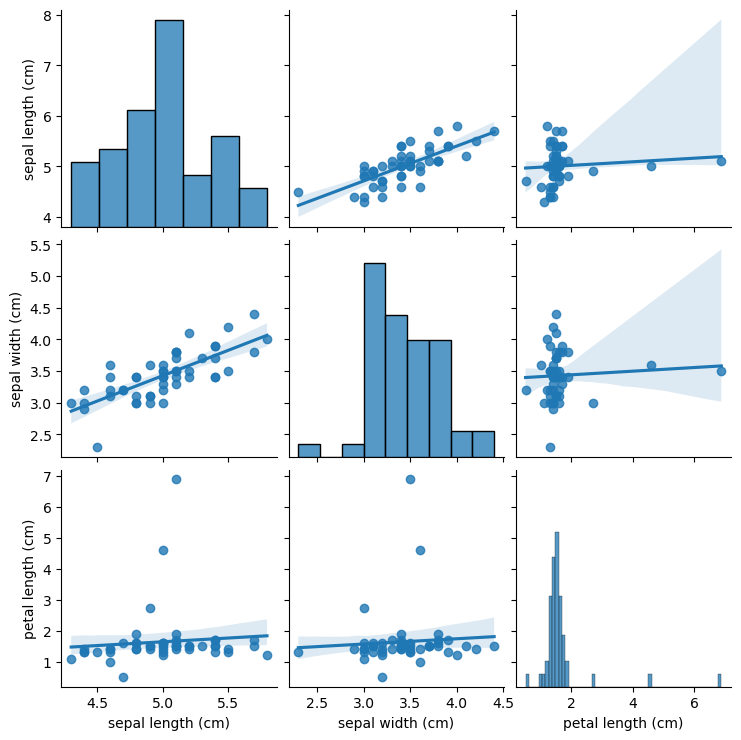

In [216]:
sns.pairplot(data=setosa_data_frame, kind='reg', diag_kind='auto')
None

#### is PETALLEN has normal distribution?

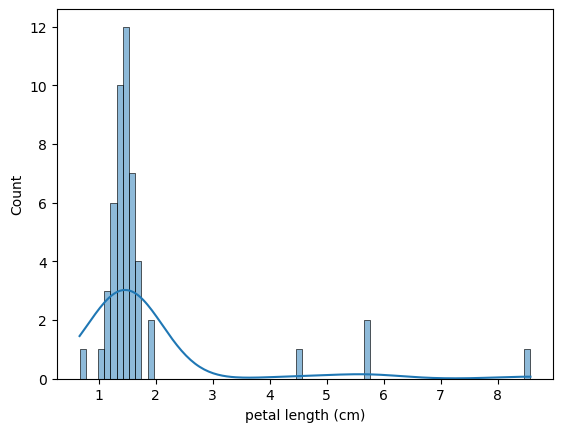

In [244]:
sns.histplot(data=setosa_data_frame['petal length (cm)'], kde=True)
None

In [247]:
shapiro_test = shapiro(setosa_petallen)
expected = norm(loc=setosa_petallen.mean(), scale=setosa_petallen.std()).rvs(size=50)
ks_test = kstest(setosa_petallen, expected)
chis_test = chisquare(f_obs=setosa_petallen.value_counts(), ddof=0, axis=None)
print('Shapiro-Wilk test: ' + str(shapiro_test.pvalue))
print('Kolmogorov-Smirnov test: ' + str(ks_test.pvalue))
print('Chi-Square test: ' + str(chis_test.pvalue))

Shapiro-Wilk test: 1.3935754676966394e-12
Kolmogorov-Smirnov test: 1.3867885687360081e-05
Chi-Square test: 2.1722521309710315e-06


#### Checking correlation coefficient

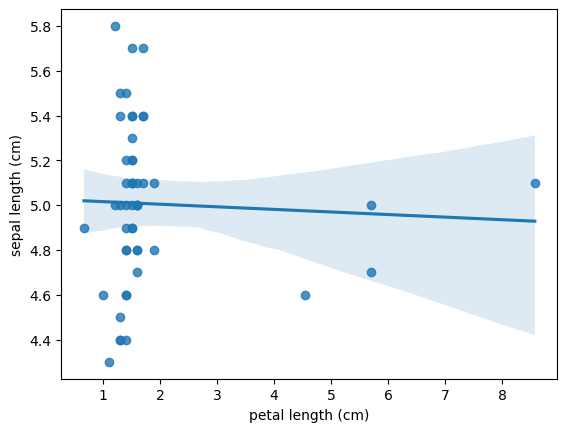

In [242]:
sns.regplot(
    x='petal length (cm)', 
    y='sepal length (cm)', 
    data=setosa_data_frame)
None

In [253]:
rho, p = spearmanr(setosa_data_frame['sepal length (cm)'], setosa_data_frame['petal length (cm)'])
print('spearman correlation coefficient: ' + str(rho))
print('spearman P-value: ' + str(p))

spearman correlation coefficient: 0.22457039672596352
spearman P-value: 0.11690694096066725


### Regression analysis

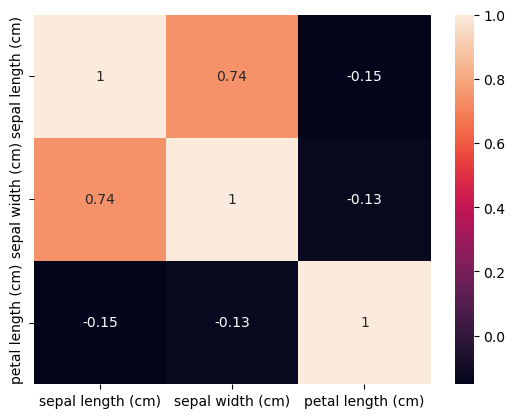

In [8]:
sns.heatmap(setosa_data_frame.corr(), annot = True)
None

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y=setosa_data_frame[['sepal length (cm)']].astype(float)
X=setosa_data_frame[['sepal width (cm)', 'petal length (cm)']].astype(float)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sepal length (cm)   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     29.29
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           5.51e-09
Time:                        18:20:55   Log-Likelihood:                 1.9260
No. Observations:                  50   AIC:                             2.148
Df Residuals:                      47   BIC:                             7.884
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.6893      0.323      8.323      0.000       2.039       3.339
sepal width (cm)      0.6836      0.091      7.493      0.000       0.500       0.867
petal length (cm)    -0.0145      0.024     -0.602      0.550      -0.063       0.034
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.547
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.375
Skew:                          -0.109   Prob(JB):                        0.829
Kurtosis:                       2.636   Cond. No.                         40.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y=setosa_data_frame[['sepal length (cm)']].astype(float)
X=setosa_data_frame[['sepal width (cm)']].astype(float)
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sepal length (cm)   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.99
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           6.71e-10
Time:                        18:21:47   Log-Likelihood:                 1.7341
No. Observations:                  50   AIC:                            0.5319
Df Residuals:                      48   BIC:                             4.356
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6390      0.310      8.513      0.000       2.016       3.262
sepal width (cm)     0.6905      0.090      7.681      0.000       0.510       0.871
==============================================================================
Omnibus:                        0.274   Durbin-Watson:                   2.542
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.464
Skew:                          -0.041   Prob(JB):                        0.793
Kurtosis:                       2.535   Cond. No.                         34.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""